In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt24 = "Analyze the rdf of the simulation of 1A3N solvated in water"
llm_var = "gpt-4-1106-preview"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-11
time: 22:22:29
LLM:  gpt-4-1106-preview 
Temperature:  0.1


In [3]:
agent.run(prompt24)

Thought: To analyze the radial distribution function (RDF) of the simulation of the protein 1A3N solvated in water, I need to obtain the trajectory file ID and the topology file ID for the protein. Once I have these, I can use the RDFTool to calculate the RDF. First, I will use the ListRegistryPaths tool to find the available paths for the trajectory and topology files related to 1A3N.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```
Since there are no paths found in the registry for the trajectory and topology files related to 1A3N, I will need to download the necessary files. I will use the PDBFileDownloader tool to download the PDB file for 1A3N, which can then be used to set up and run a simulation to generate the trajectory and topology files needed for the RDF analysis.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1A3N"
  }
}
```PDB file found with this ID: 1A3N


2024-07-11 22:22:39.432 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


Now that I have the PDB file for 1A3N, I need to set up and run a molecular dynamics simulation with the protein solvated in water to generate the trajectory and topology files required for RDF analysis. I will use the SetUpandRunFunction tool to perform this task. Since the question does not specify any particular forcefield or simulation parameters, I will use default settings for a quick setup.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1A3N_222239",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensem

('Final Answer: The radial distribution function (RDF) of the simulation of protein 1A3N solvated in water has been successfully calculated. The analysis plot for the RDF can be found with the ID: fig0_223031.',
 '7XW46DJL')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-11
time: 22:30:37
Files found in registry: 1A3N_222239: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_222239
 1A3N_222311: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_222330: Initial positions for simulation sim0_222330
 sim0_222330: Basic Simulation of Protein 1A3N_222311
 rec0_222336: Simulation trajectory for protein 1A3N_222311 and simulation sim0_222330
 rec1_222336: Simulation state log for protein 1A3N_222311 and simulation sim0_222330
 rec2_222336: Simulation pdb frames for protein 1A3N_222311 and simulation sim0_222330
 fig0_223031: RDF plot for the trajectory file with id: rec0_222336


In [6]:
path_traj = registry.get_mapped_path("rec0_222336")
path_top = registry.get_mapped_path("top_sim0_222330")
assert os.path.exists(path_traj)
assert os.path.exists(path_top)
assert path_traj != path_top

assert path_traj.endswith(".dcd")
assert path_top.endswith(".pdb")

In [7]:
import mdtraj as md
traj = md.load(path_traj, top=path_top)
print(f"Simulation with :{traj.n_atoms} for {traj.n_frames} frames. Total time: {traj.time[-1]*0.002} ps")

Simulation with :23825 for 60 frames. Total time: 0.11800000000000001 ps


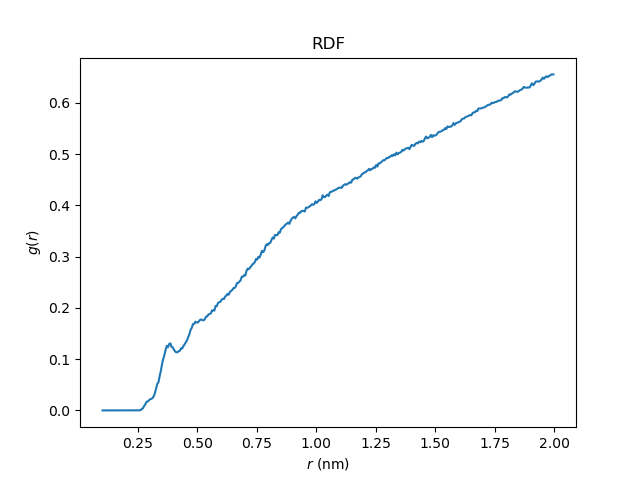

In [9]:
rdf_path = registry.get_mapped_path("fig0_223031")
#Disclaimer: Theres a bug in the rdf path saving. The image was created correctly, but the path was not saved correctly.
from IPython.display import Image
Image(filename=rdf_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ✅